In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import pickle

from rubin_scheduler.scheduler.model_observatory import ModelObservatory
from rubin_scheduler.scheduler.utils import TargetoO, get_current_footprint
from rubin_scheduler.scheduler.example.too_surveys import gen_too_surveys
from rubin_scheduler.scheduler.detailers import GrabSettingDetailer
from rubin_scheduler.utils import _approx_ra_dec2_alt_az

In [2]:
def project_lambert(longitude, latitude):
    """Project from RA,dec to plane
    https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection
    """

    # flipping the sign on latitude goes north pole or south pole centered
    r_polar = 2 * np.cos((np.pi / 2 + latitude) / 2.0)
    # Add pi/2 so north is up
    theta_polar = longitude + np.pi / 2

    x = r_polar * np.cos(theta_polar)
    y = r_polar * np.sin(theta_polar)
    return x, y

In [3]:

with open('test_too.p', 'rb') as f:
    loaded_data = pickle.load(f)
    

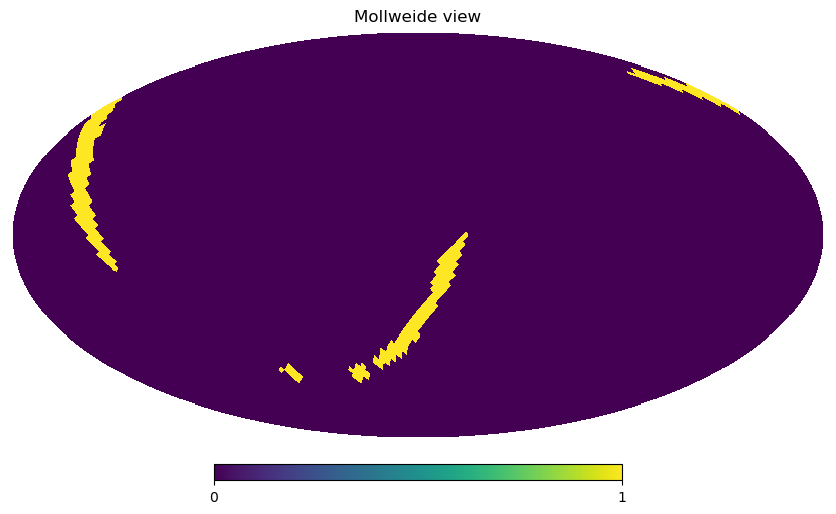

In [4]:
hp.mollview(loaded_data[0].footprint)

In [5]:
loaded_data[0]

In [30]:
# let's set up a model observatory and get conditions
mo = ModelObservatory()
mo.mjd += .3
conditions = mo.return_conditions()

In [31]:
too = TargetoO(100, loaded_data[0].footprint, conditions.mjd, 100, 0, 0, "GW_case_A", None)


In [32]:
conditions.targets_of_opportunity = [too]

In [33]:
surveys = gen_too_surveys(too_footprint=get_current_footprint(nside=32)[0]["r"])[0]

In [34]:
surveys

<ToOScriptedSurvey survey_name='ToO, GW_case_A' at 0x30e31b890>

In [35]:
surveys.update_conditions(conditions)

In [36]:
obs = surveys.generate_observations(conditions)

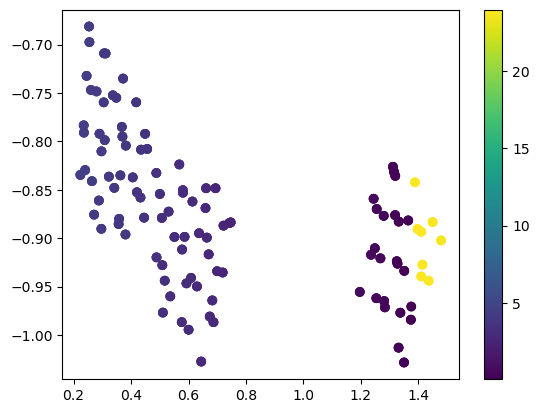

In [37]:
ha = (np.max(conditions.lmst) - obs["RA"]* 12.0 / np.pi) % 24

plt.scatter(obs["RA"], obs["dec"], c=ha)
plt.colorbar()

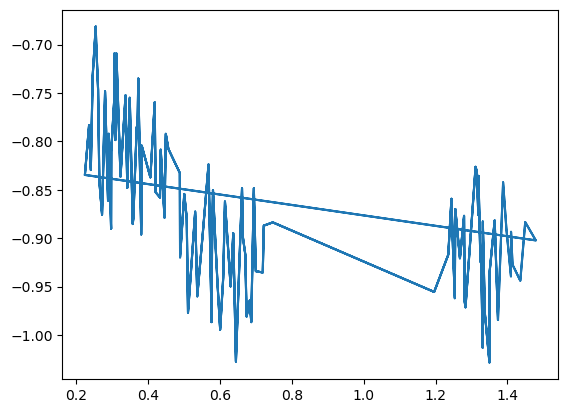

In [38]:
plt.plot(obs["RA"], obs["dec"])

In [39]:
alt, az = _approx_ra_dec2_alt_az(obs["RA"], obs["dec"], conditions.site.latitude_rad, conditions.site.longitude_rad, conditions.mjd)

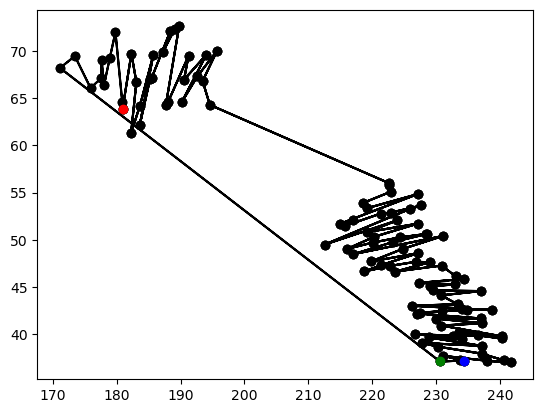

In [40]:
fig, ax = plt.subplots()

#xp,yp =project_lambert(az,alt)

ax.plot(np.degrees(az), np.degrees(alt), '-ko')
ax.plot(np.degrees(az[0]), np.degrees(alt[0]), 'go')
ax.plot(np.degrees(az[1]), np.degrees(alt[1]), 'bo')

ax.plot(np.degrees(az[-1]), np.degrees(alt[-1]), 'ro')


#plt.plot(xp[0], alt[0], 'go')
#x, y = project_lambert(0, np.radians([20,90]))
#max_val = np.max(np.abs([x, y]))
#ax.set_xlim([-max_val, max_val])
#ax.set_ylim([-max_val, max_val])

Text(0, 0.5, 'Altitude (deg)')

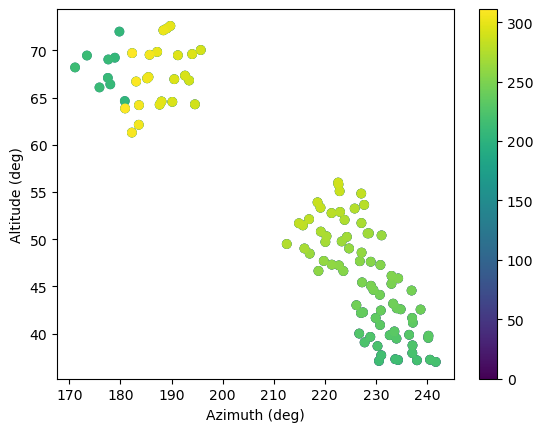

In [41]:
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(az), np.degrees(alt), c=np.arange(az.size))
plt.colorbar(scat)
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Altitude (deg)")


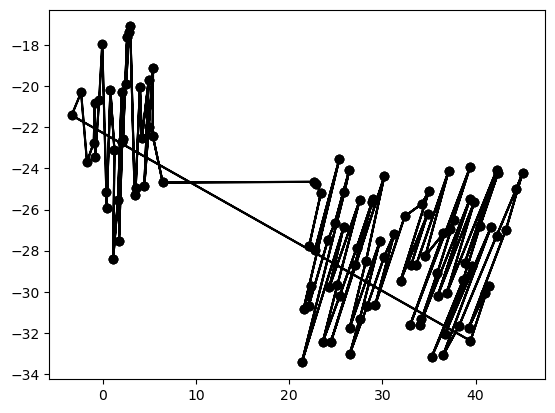

In [42]:
fig, ax = plt.subplots()

xp,yp =project_lambert(az,alt)

ax.plot(np.degrees(xp), np.degrees(yp), '-ko')
#

In [43]:
np.unique(obs["RA"]).size, obs.size

(107, 312)

In [44]:
det = GrabSettingDetailer()

In [45]:
ack = det(obs, conditions)

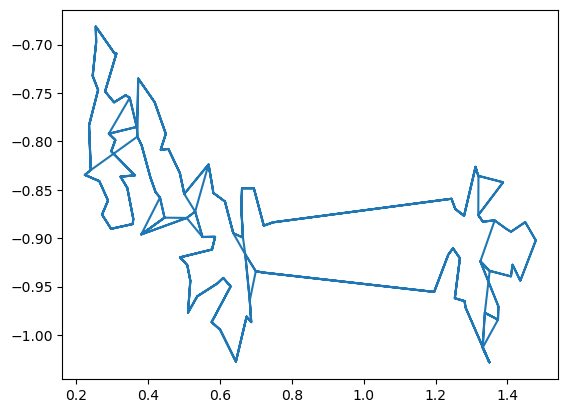

In [46]:
plt.plot(ack["RA"], ack["dec"])


In [47]:
ack["band"]


ObservationArray(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
                  'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
                  'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i'

In [48]:
new_ha = (np.max(conditions.lmst) - ack["RA"]* 12.0 / np.pi) % 24

In [49]:
new_ha * 12/np.pi

ObservationArray([16.96943891, 16.38278102, 16.02944573, 16.27204288,
                  15.90507755, 15.0255146 , 15.0025333 , 15.24685018,
                  15.52235256, 14.93837337, 15.89825276, 15.7326135 ,
                  15.99737046, 14.86313011, 15.14652868, 15.31816228,
                  15.78433084, 16.14969218, 15.68844139, 15.76605985,
                  16.5286724 , 16.51132293, 16.65326927, 16.4326753 ,
                  16.80021881, 16.79040421, 16.7285216 , 16.96943891,
                  16.38278102, 16.02944573, 16.27204288, 15.90507755,
                  15.0255146 , 15.0025333 , 15.24685018, 15.52235256,
                  14.93837337, 15.89825276, 15.7326135 , 15.99737046,
                  15.14652868, 15.31816228, 15.78433084, 16.14969218,
                  15.68844139, 15.76605985, 16.5286724 , 16.51132293,
                  16.65326927, 16.4326753 , 16.80021881, 16.79040421,
                  16.7285216 , 16.96943891, 16.38278102, 16.02944573,
                  16

In [50]:
ack["band"]



ObservationArray(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
                  'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
                  'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i'

In [51]:
alt, az = _approx_ra_dec2_alt_az(ack["RA"], ack["dec"], conditions.site.latitude_rad, conditions.site.longitude_rad, conditions.mjd)

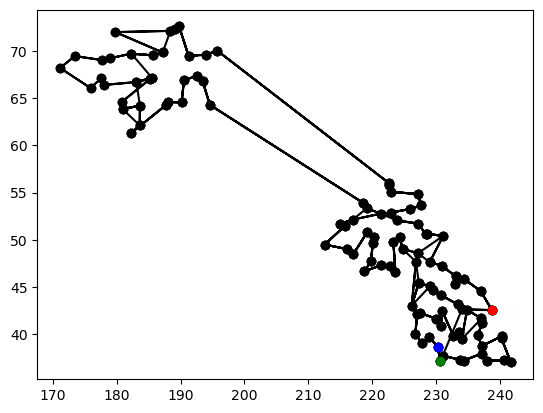

In [52]:
fig, ax = plt.subplots()

#xp,yp =project_lambert(az,alt)

ax.plot(np.degrees(az), np.degrees(alt), '-ko')
ax.plot(np.degrees(az[0]), np.degrees(alt[0]), 'go')
ax.plot(np.degrees(az[1]), np.degrees(alt[1]), 'bo')

ax.plot(np.degrees(az[-1]), np.degrees(alt[-1]), 'ro')


Text(0, 0.5, 'Altitude (deg)')

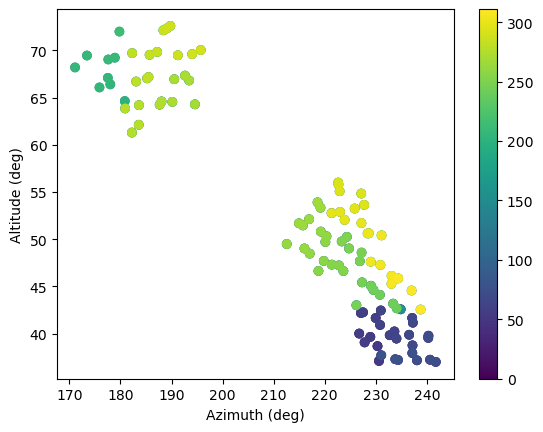

In [53]:
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(az), np.degrees(alt), c=np.arange(az.size))
plt.colorbar(scat)
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Altitude (deg)")



Text(0, 0.5, 'Altitude (deg)')

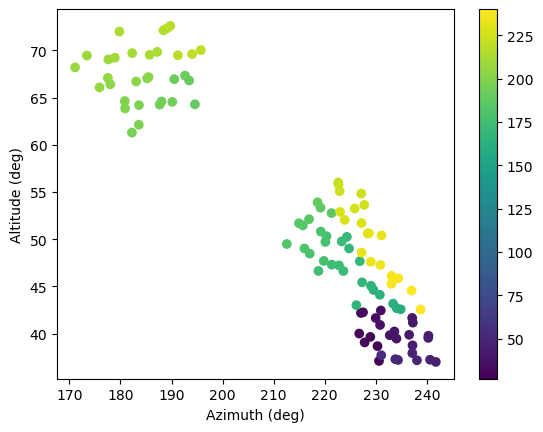

In [54]:
b1 = np.where(ack["band"] == "g")[0]

fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(az[b1]), np.degrees(alt[b1]), c=np.arange(az.size)[b1])
plt.colorbar(scat)
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Altitude (deg)")



Text(0, 0.5, 'Altitude (deg)')

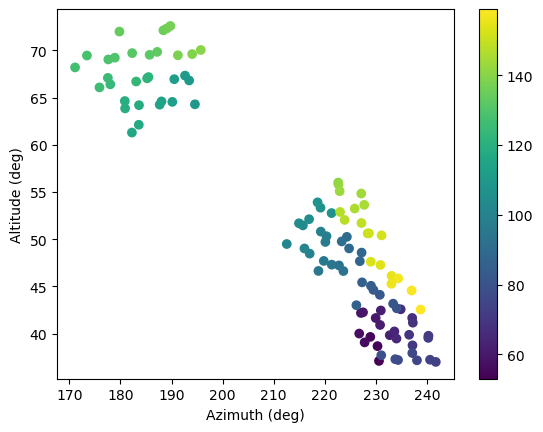

In [55]:
b1 = np.where(ack["band"] == "i")[0]
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(az[b1]), np.degrees(alt[b1]), c=np.arange(az.size)[b1])
plt.colorbar(scat)
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Altitude (deg)")
